In [30]:
%matplotlib inline

import numpy as np
import cv2
from glob import glob
from PIL import Image
from ipywidgets import interact, fixed, IntSlider
from matplotlib import pyplot as plt
from itertools import islice

In [38]:
def show_images(images):
    fig = plt.figure()
    for i in range(len(images)):
        img = images[i]
        a = fig.add_subplot(1, len(images), i + 1)
        plt.imshow(img)
        #plt.axis('off')
    plt.show()

def show_rgb(img):
    show_image_row([img])
    
def show_hsv(images):
    show_image_row(cv2.cvtColor(img, cv2.COLOR_HSV2RGB) for img in images)

def show_gray(images):
    show_image_row(images)

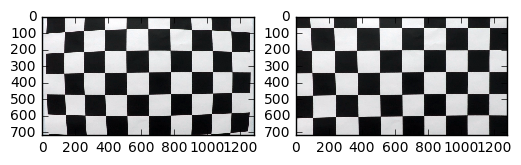

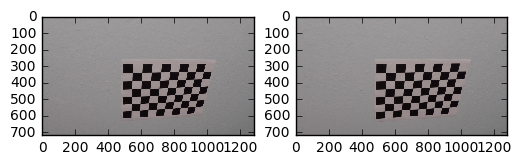

In [39]:
chess_shape = (9, 6)
objpoints = []
imgpoints = []
objp = np.zeros((6*9, 3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1, 2)
for path in glob('camera_cal/*'):
    img = cv2.imread(path) 
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, chess_shape, None)
    
    if ret:
        imgpoints.append(corners)
        objpoints.append(objp)

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

def undistort(img):
    return cv2.undistort(img, mtx, dist, None, mtx)

for path in islice(glob('camera_cal/*'), 2):
    img = cv2.imread(path)
    dst = undistort(img)
    show_images([img, dst])

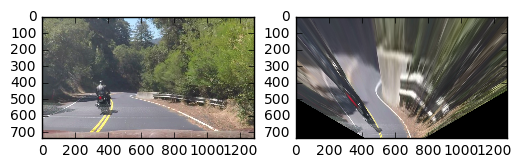

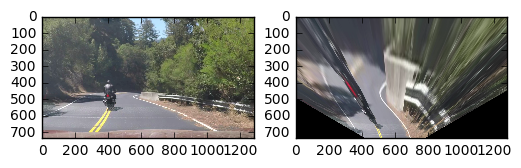

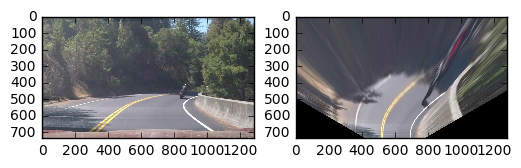

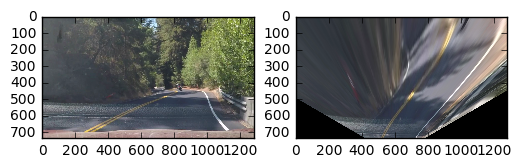

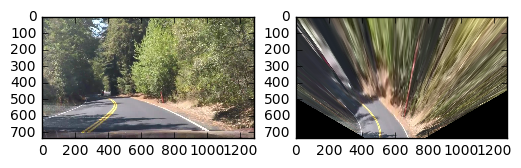

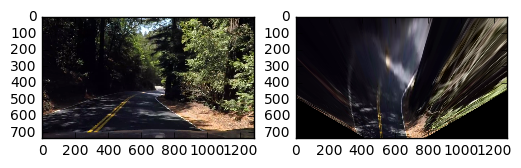

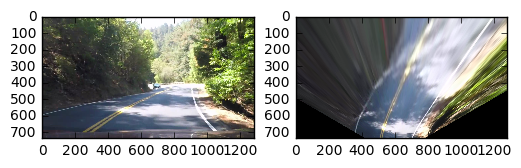

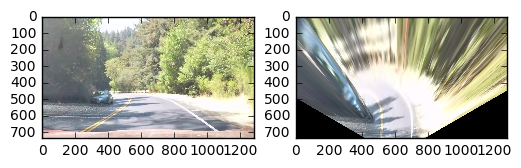

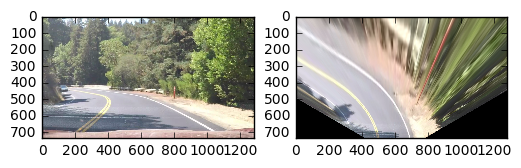

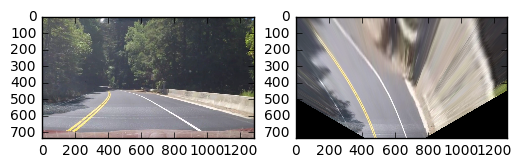

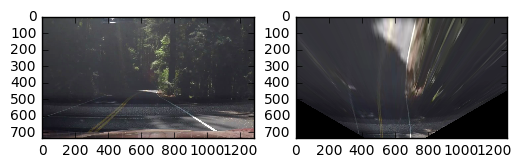

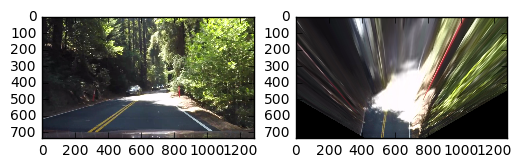

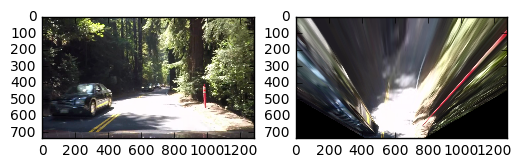

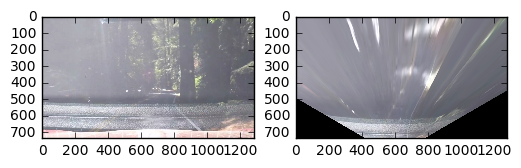

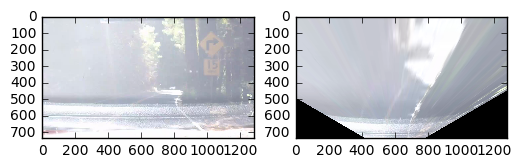

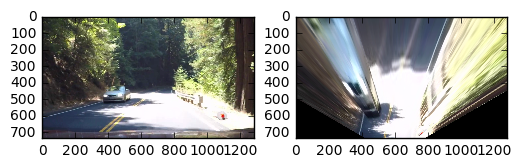

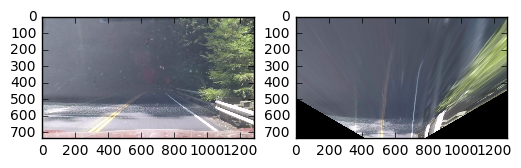

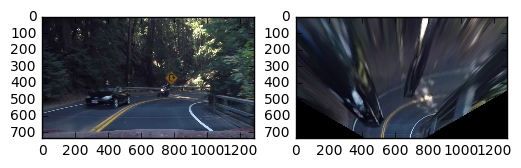

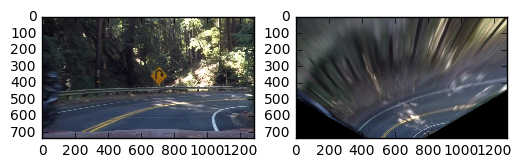

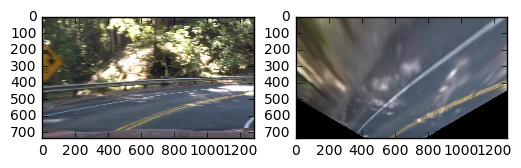

In [59]:
# TODO: Look for better points

src = np.float32([
        [180, 565],
        [500, 465],
        [835, 465],
        [1280, 565]])

src = np.float32([
        [253, 685],
        [572, 465],
        [709, 465],
        [1052, 685]])

dst = np.float32([
        [500, 750],
        [500, 300],
        [700, 300],
        [700, 750]])

M = cv2.getPerspectiveTransform(src, dst)

def get_road(img):
    img_size = (img.shape[1], img.shape[0])
    # we mostly are interested in upscaling and CUBIC seems to be quite good
    # http://tanbakuchi.com/posts/comparison-of-openv-interpolation-algorithms/
    return cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_CUBIC)
    
for i in islice(glob('test_images2/*'), 20):
    img = np.asarray(Image.open(i))
    road = get_road(img)
    show_images([img, road])

(3, 2)
[[ 4.16666651  1.83333337]]
[[-0.70710677  0.70710677]
 [ 0.70710677  0.70710677]]


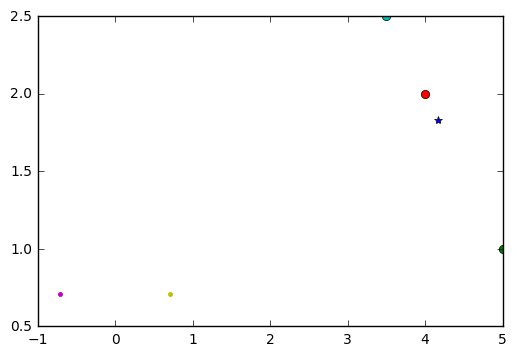

In [4]:
test_points = np.float32([[5, 1], [4, 2], [3.5, 2.5]])
#test_points = np.float32([[5,4,3,3.5], [1,3,5,4.5]])
#test_points = np.float32([[5,4], [1,3]])
print(test_points.shape)
mean = np.mean(test_points, axis=0).reshape(1,-1)
print(mean)
mean, eigenvectors = cv2.PCACompute(test_points, mean)
print(eigenvectors)

for m in mean:
    plt.plot(m[0], m[1], '*')

for p in test_points:
    plt.plot(p[0], p[1], 'o')

for v in eigenvectors:
    plt.plot(v[0], v[1], '.')
    
plt.show()

[[[  0   0   0]
  [  0 255   0]
  [  0   0 255]]]


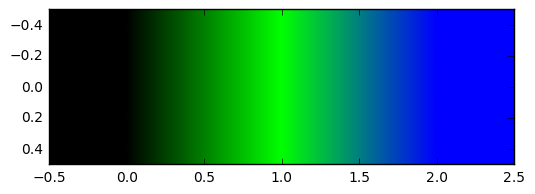

In [5]:
rgb = np.array(Image.open('rgb.png'))
rgb[0][0] = [0,0,0]
print(rgb)
plt.figure()
plt.imshow(rgb)

(738, 1280)


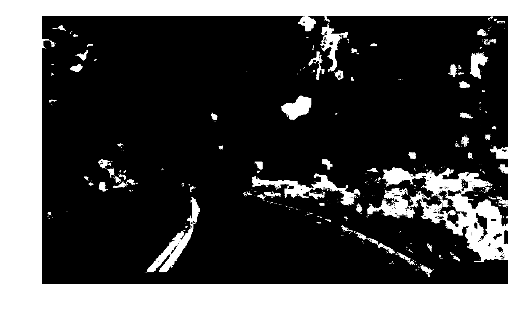

(738, 1280)


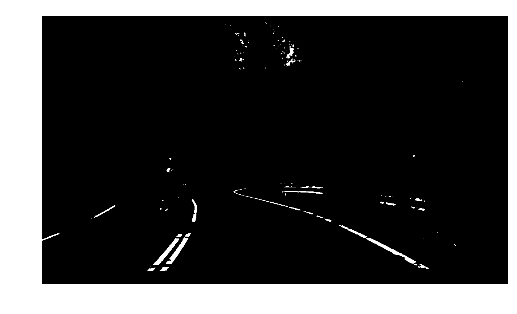

(738, 1280)


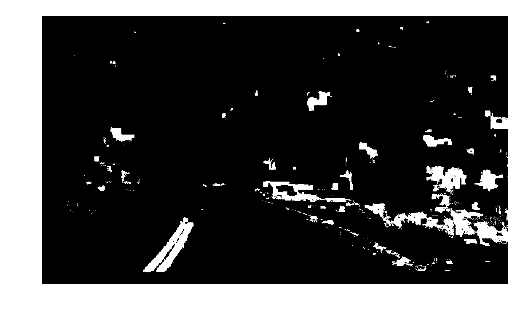

(738, 1280)


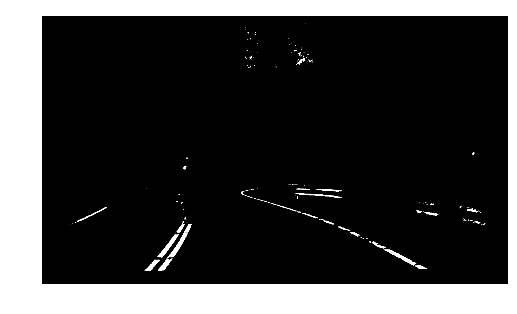

In [8]:
def find_lane_yellow_mask(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h = hsv[:,:,0]
    mask = np.zeros_like(h)
    mask[(h > 15) & (h <= 31)] = 1
    return mask
    
def find_lane_gray_mask(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    mask = np.zeros_like(gray)
    mask[gray >= 225] = 1
    return mask
    
def show_image(imm, light):
    ii = cv2.cvtColor(imm, cv2.COLOR_RGB2GRAY)
    ii[ii < light] = 0
    show_gray([ii])

for i in islice(glob('test_images2/*'), 2):
    img = np.array(Image.open(i))
    show_gray([np.float32(find_lane_yellow_mask(img))])
    show_gray([np.float32(find_lane_gray_mask(img))])
    
    #hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    #show_hsv(hsv)
    
    #h = hsv[:,:,0]
    #s = hsv[:,:,1]
    #v = hsv[:,:,2]
    #show_gray([h, s, v])
    # yellow is 15 <= hue < 31
    #img[(h < 15) | (25 < h)] = 0
    #show_rgb(img)
    
    #interact(show_image, imm = fixed(img), light=IntSlider(min=0, max=255, value=200))
        


In [ ]:
for i in islice(glob('test_images2/*'), 8):
    img = np.array(Image.open(i))
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray = cv2.blur(gray, ksize=(3, 3))
    contours = cv2.findContours(gray, mode=cv2.RETR_LIST, method=cv2.CHAIN_APPROX_SIMPLE)
    print(contours)
    for j in range(len(contours)):
        cv2.drawContours(img, np.array(contours), j, [255, 0, 0])

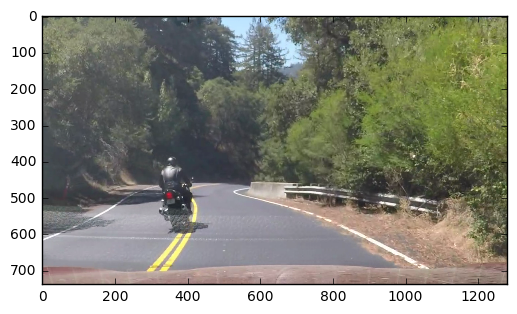

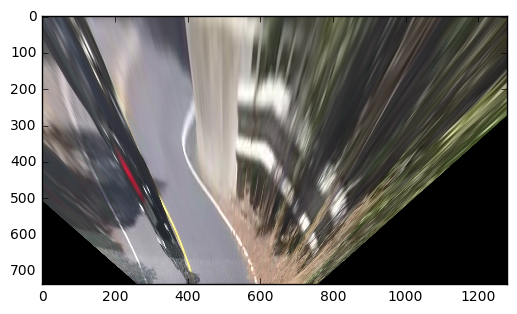

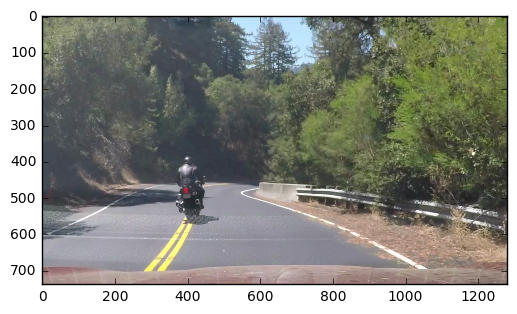

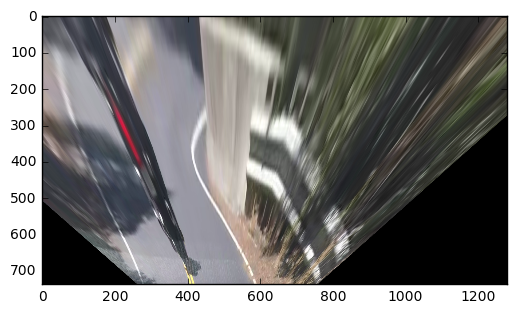

In [ ]:
@interact(x=(0, 20))
def update_image(x):
    img = np.asarray(Image.open(i))
    h, w = img.shape[:2]
    mask = np.zeros((h+2, w+2), np.uint8)
    cv2.floodFill(img, mask, (345, 647), (255, 0, 0), (x, x, x), (x, x, x))
    plt.imshow(img)